### **TP Final Análisis de Datos:**
Evaluación de la performance de modelos de clasificación con datos tumores de cáncer de mama en *malignos* o *benignos*.

Estudiantes:


*   Gustavo Julián Rivas
*   Myrna Lorena Degano
*   Santiago José Olaciregui
*   Fabricio Lopretto

## 1 - Introducción:
Este trabajo evaluó y comparó la performance (en un set de datos determinado) de la clasificación de diferentes modelos, como por ejemplo *k-vecinos cercanos*, *árboles de decisón*, etc.

Para ello se usó una base de datos con diferentes atributos asociados a tumores mamarios. A partir de técnicas de procesamiento imagenes utilizando un clasificador inductivo basado en programación lineal, se creó un sistema de alta precisión para el diagnóstico de tumores de mama (Wolberg y otros, 1992).

A partir de muestras tomadas mediante jeringa y con una interfaz interactiva, se inicializaron modelos de contorno activos, conocidos como *snakes*, cerca de los límites de un conjunto de núcleos celulares.

Las *snakes* personalizadas se deforman con la forma exacta de los núcleos. Esto permite un análisis preciso y automatizado del tamaño, la forma y la textura del núcleo. Se calculan diez características para cada núcleo, definiendo su el valor medio, el valor más grande (o peor) y la desviación estándar de cada característica para cada tumor en particular. Por ejemplo, el radio medio se calcula como la media de la distancia del centro de la célula hasta cada punto del perímetro.

El set de Datos utilizado lleva el nombre de *Conjunto de datos Breast Cancer Wisconsin (Diagnostic)* (Wolberg y otros, 1995).

Contiene características/atributos obtenidas a partir de imágenes digitales de células mamarias, como el radio, la textura, perímetro, y otras características. Se lo puede encontrar en el siguiente link:

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Información adicional

Como se mencionó, las características se calculan a partir de una imágenes de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. Algunas de las imágenes se pueden encontrar en http://www.cs.wisc.edu/~street/images/




Los atributos categóricos son:

Atributo | Descripción | Unidad
:---: | :---: | :---:
`ID` | Número de registro. | adimensional
`diagnosis` | Clasificación en maligno o benigno. | adimensional           

Los atributos continuos para un determinado tumor son calculados a partir de varias mediciones de una misma variable a partir de su correspondiente imagenes.
Por ende, los siguientes atributos tendrán valor medio, desviación estándar y el peor valor (el que más tiende a un diagnóstico de maligno para ese tumor en particular).

Atributo | Descripción | Unidad
:---: | :---: | :---:
`radio` | Distancia media desde el centro a los puntos en el perímetro. | μm
`texture` | Desviación standard media de la escala de grises de la imagen. | adimensional
`perimeter` | Perímetro medio del tumor. | μm
`area` | Área media del tumor. | μm^2          
`smoothness` | Variación local media de la longitud del radio. | adimensional     
`compactness` | Valor medio de la compactación: perimeter^2 / area - 1.0. | adimensional
`concavity` | Valor medio de la concavidad. | adimensional            
`concave_points` | Valor medio de número de porciones cóncavas del contorno. | adimensional        
`symmetry` | Valor de simetría media. | adimensional            
`fractal_dimension` | Valor medio de "coastline approximation" - 1. | adimensional


In [ ]:
"""
Este script permite realizar un tratamiento a los datos
para ser luego utilizados por modelos de clasificación.
"""

In [170]:
!pip install seaborn


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
# Se importan las librerias nencesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [172]:
# Se define la ruta al archivo de datos
directorio_actual = os.getcwd()
directorio_padre = os.path.dirname(directorio_actual)
directorio_datos = directorio_padre + '/Data/data_sin_procesar.xlsx'

## 2 - Objetivos:

Realizar un tratamiento de los datos para ser usados:

2.1 - Evaluar si hay faltantes. Si los hay, evaluar su tratamiento.

2.2 - Evaluar si hay registros repetidos. Si los hay, eliminarlos.

2.3 - Unificar tipo de dato.

2.3.1 - Aplicar una transformación a la variable categórica.

2.4 - Reducción de dimensionalidad.

2.5 - Definir un umbral para *outliers*, identificarlos y tratarlos.

2.6 - Escalamiento de variables.


In [173]:
# Se carga el DataFrame con los registros que tienen los atributos y target.
df = pd.read_excel(directorio_datos, sheet_name='data')

### 2.1 - Se evalúa si hay datos faltantes.

In [174]:
def datos_faltantes(df):
  """
  Permite conocer la cantidad de datos faltantes de
  cada campo del Data Frame de ingresado.

  :param:
  :df: DataFrame con los atributos.
  """
  campos = df.columns.tolist()
  for campo in campos:
    # Hay registros con datos faltantes?
    print(f"Cantidad de datos faltantes de {campo}: {df[campo].isna().sum()}")


In [175]:
datos_faltantes(df)

Cantidad de datos faltantes de ID: 0
Cantidad de datos faltantes de diagnosis: 0
Cantidad de datos faltantes de radio_mean: 0
Cantidad de datos faltantes de texture_mean: 0
Cantidad de datos faltantes de perimeter_mean: 0
Cantidad de datos faltantes de area_mean: 0
Cantidad de datos faltantes de smoothness_mean: 0
Cantidad de datos faltantes de compactness_mean: 0
Cantidad de datos faltantes de concavity_mean: 0
Cantidad de datos faltantes de concave_points_mean: 0
Cantidad de datos faltantes de symmetry_mean: 0
Cantidad de datos faltantes de fractal_dimension_mean: 0
Cantidad de datos faltantes de radio_std: 0
Cantidad de datos faltantes de texture_std: 0
Cantidad de datos faltantes de perimeter_std: 0
Cantidad de datos faltantes de area_std: 0
Cantidad de datos faltantes de smoothness_std: 0
Cantidad de datos faltantes de compactness_std: 0
Cantidad de datos faltantes de concavity_std: 0
Cantidad de datos faltantes de concave_points_std: 0
Cantidad de datos faltantes de symmetry_std:

In [176]:
# Se realiza el mapa de calor de datos faltantes
def mapa_calor_faltantaes(df):
  """
  Genera el mapa de calor para visualizar
  donde se alojan los datos faltantes.

  :param:
  :df: DataFrame con los atributos.
  """
  plt.figure(figsize=(10, 6))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  plt.title('Mapa de Calor de Datos Faltantes')
  plt.xlabel('Columna')
  plt.ylabel('Registro')
  plt.show()


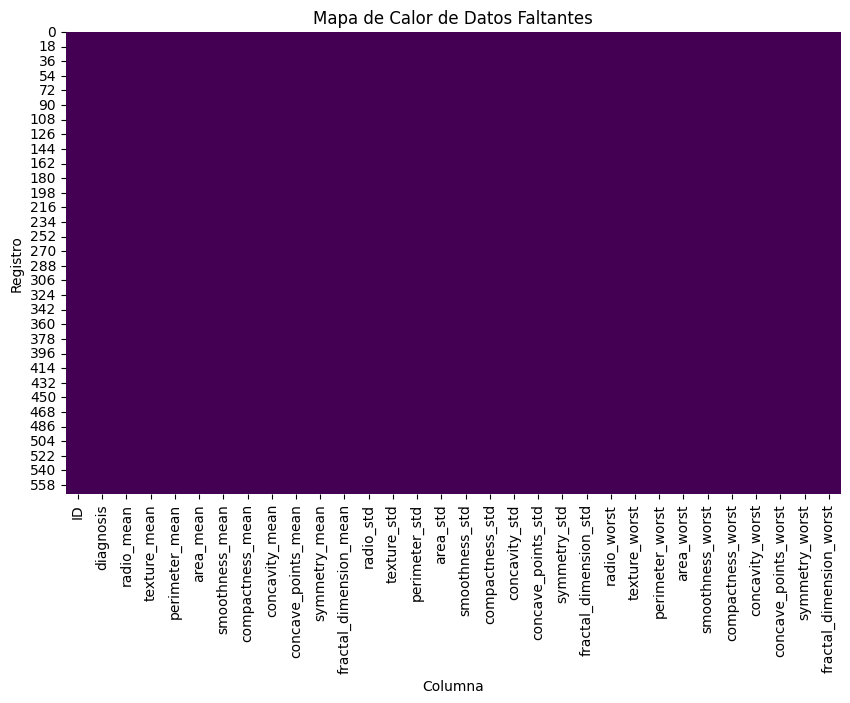

In [177]:
mapa_calor_faltantaes(df)

Observaciones: Ninguna de las características ni el target tienen datos faltantes.

Se busca si las características reales tienen valores numéricos que se asocian a faltantes, para ello se busca el rango de cada una de ellas.

In [178]:
#Se busca el rango de cada matriz
rango = df.describe().loc[['min', 'max']]

# Se agrega el indice 'range' y  se completa la fila creada con la diferencia entre 'max' y 'min'.
rango.loc['range'] = rango.loc['max'] - rango.loc['min']

# se presenta el rango de cada campo
rango.head()


,ID,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radio_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
min,8670.0,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,911320502.0,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750
range,911311832.0,21.129,29.57,144.71,2357.5,0.11077,0.32602,0.4268,0.2012,0.198,...,28.11,37.52,200.79,4068.8,0.15143,1.03071,1.252,0.291,0.5073,0.15246


Sabiendo que las variables miden magnitudes físicas positivas, se observó que en todos los casos los valores mínimos y máximos resultan consistentes. Por otro lado, se vio que la magnitud del rango entre las diferentes características varía, lo que invita a realizar un escalamiento de las mismas.

Además, se busca si existe alguna observación que haya sido completada con algún caracter especial ('-' por ejemplo) para indicar faltantes.

In [179]:
# Verificar si existe alguna fila con todos los valores como '-'
hay_fila_con_solo_guiones = df.apply(lambda row: all(cell == '-' for cell in row), axis=1).any()

print(f"¿Existe alguna observación completada solo con '-': {hay_fila_con_solo_guiones}")

¿Existe alguna observación completada solo con '-': False


### 2.2 - Se evalúa si hay registros repetidos.

In [180]:
# Verificar si hay registros duplicados en todo el DataFrame
def duplicados(df):
  """
  Verifica si el DataFrame ingresado tiene
  registros duplicados.

  :param:
  :df: DataFrame con los atributos.
  """
  hay_duplicados = df.duplicated().any()

  if hay_duplicados:
      print("El DataFrame tiene registros duplicados.")
  else:
      print("El DataFrame no tiene registros duplicados.")


In [181]:
duplicados(df)

El DataFrame no tiene registros duplicados.


### 2.3 - Unificar tipo de dato.



In [182]:
# Se muestran los tipos de datos de los atributos
print(f"Cantidad de filas: {df.shape[0]}\n")
print(f"Columnas:\n{df.dtypes}")

Cantidad de filas: 569

Columnas:
ID                           int64
diagnosis                   object
radio_mean                 float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radio_std                  float64
texture_std                float64
perimeter_std              float64
area_std                   float64
smoothness_std             float64
compactness_std            float64
concavity_std              float64
concave_points_std         float64
symmetry_std               float64
fractal_dimension_std      float64
radio_worst                float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst    

In [183]:
dtypes = df.dtypes
inte_columns = dtypes[dtypes == 'int64'].count()
real_columns = dtypes[dtypes == 'float64'].count()
cate_columns = dtypes[dtypes == 'object'].count()
print(f"Cant. campo entero: {inte_columns} \nCant. campo categórico: {cate_columns} \nCant. campo real: {real_columns}")

Cant. campo entero: 1 
Cant. campo categórico: 1 
Cant. campo real: 30


Observaciones: El Data Frame ya tiene los tipos de datos unificados. Las variables reales son todas del tipo 'float64', el ID de registro es del tipo 'int64' y el target es categórico.

### 2.3.1 - Transformación variable categórica.

Como se vio la variable categórica presenta baja cardinalidad (solo dos clases maligno/benigno), resulta conveniente utilizar la técnica 'One-Hot Encoding'. Se crean por ende dos variables 'dummy' llamadas 'diagnosis_B' y 'diagnosis_M' ambas con valores 0 ó 1, manteniendo el objetivo original. Por último se descarta la variable 'diagnosis_B' para eliminar colinealidad.

In [184]:
# Crea variables dummy
dummies = pd.get_dummies(df['diagnosis'], prefix='diagnosis')

# Convierte las columnas dummy a valores binarios (False=0 y True=1)
dummies = dummies.astype(int)

# Concatena las variables dummy con el DataFrame original
df_encoded = pd.concat([df, dummies], axis=1)

# Elimina la columna original 'diagnosis' y la columna dummy 'diagnosis_B'
df_encoded.drop(columns=['diagnosis_B'], inplace=True)

In [185]:
# Se observa el resultado de la transformacion
df_encoded.head()

,ID,diagnosis,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### 2.4 - Reducción de dimensionalidad.


In [188]:
#Correlacion entre las features
def mapa_correlacion(df):
  """
  Grafica el campo dicretizado de
  índices de correlación entre las
  características del Data Set.

  :param:
  :df: DataFrame con los atributos.
  """
  plt.figure(figsize=(20, 15))
  correlacion = df.iloc[:, 2:].corr().round(1)
  sns.heatmap(data=correlacion, vmin=-1, vmax=1, cmap='RdBu_r', linewidths=1, annot=False)
  plt.show()


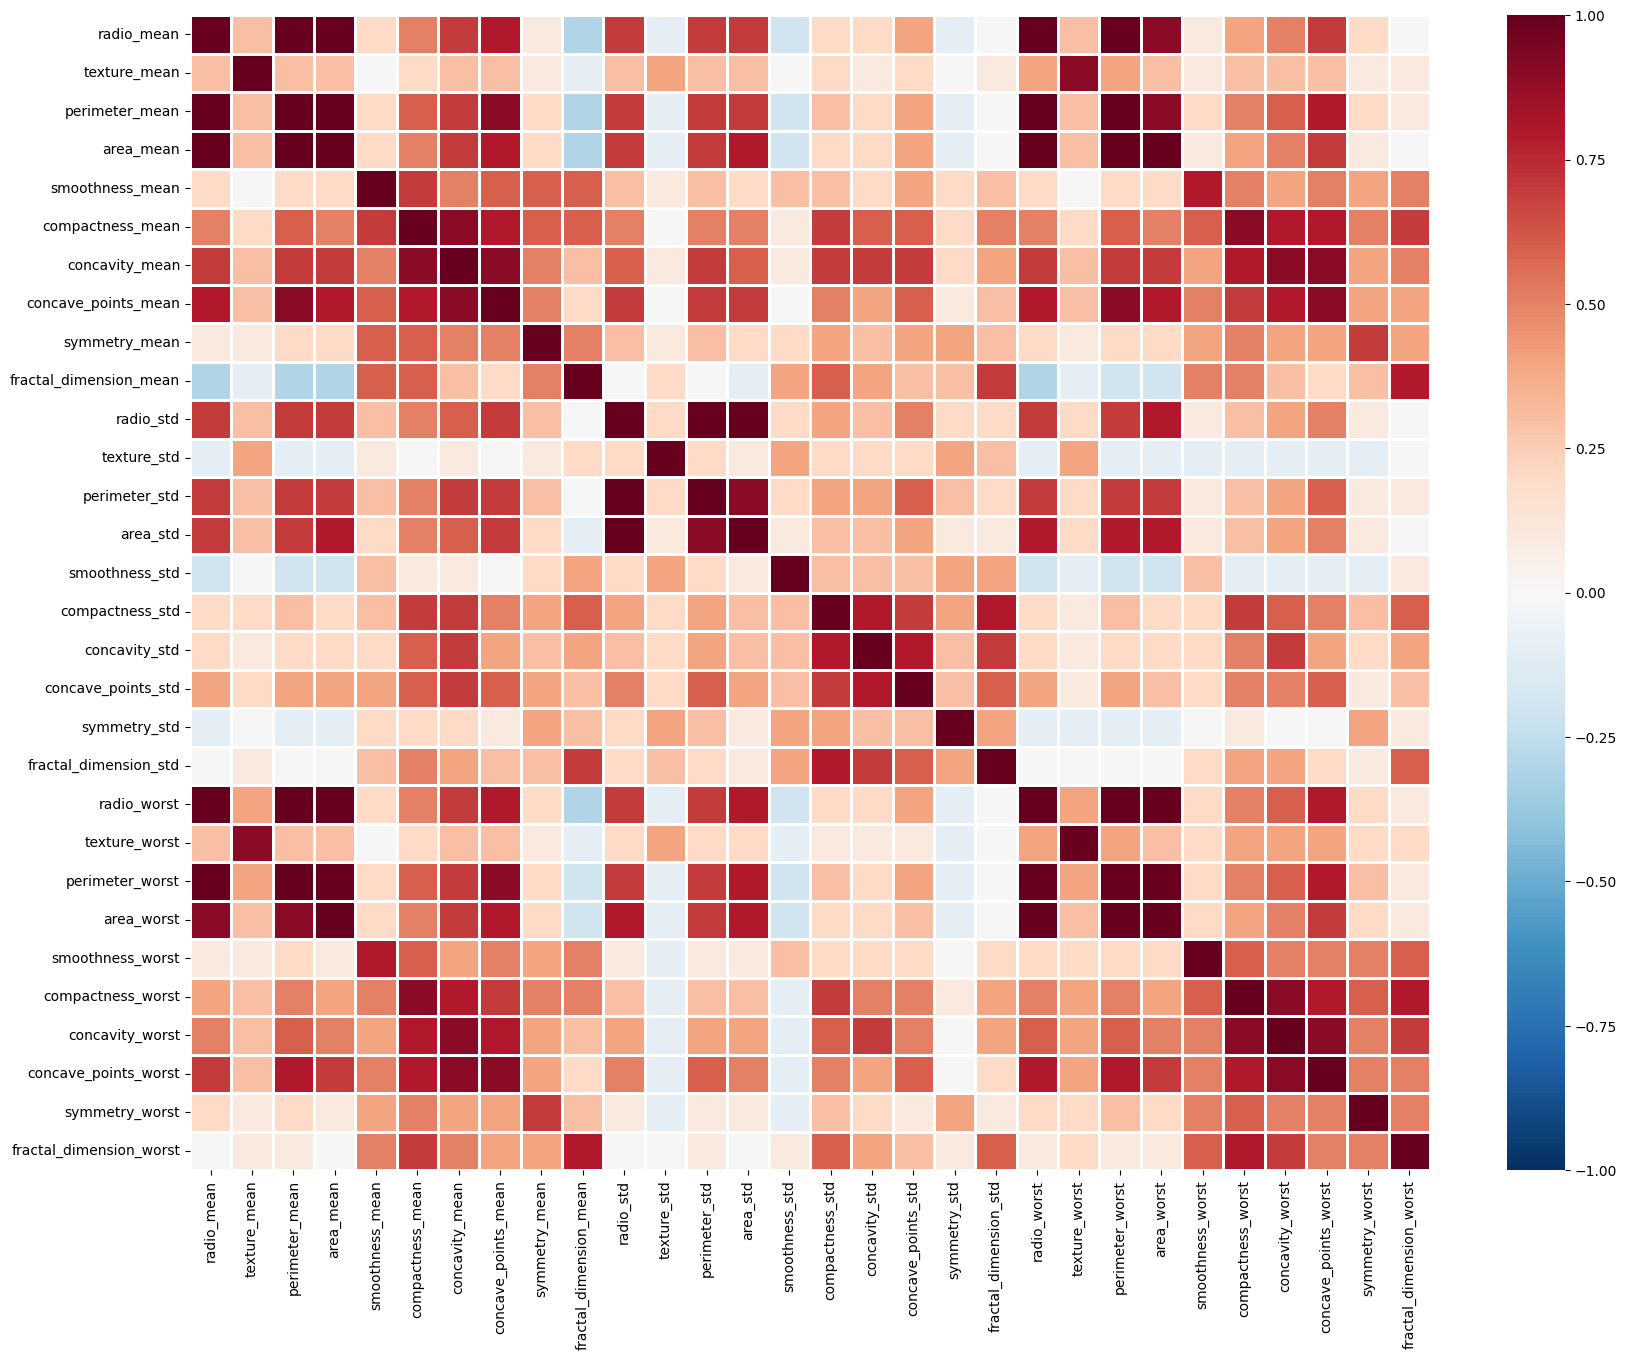

In [189]:
mapa_correlacion(df)

Observaciones: Se detectan 3 diagonales con valores cercanos (o iguales) a uno en el mapa anterior.

La principal, que se extiende de la esquina superior izquierda a la esquina inferior derecha asociada a que se realiza la correlación entre una característica y si misma.

Luego, se detectan dos diagonales abajo a la izquierda y arriba a la derecha del mapa. Esto está asociado la elevada correlación que hay entre el valor medio de una característica y el valor máximo de la misma. Con esto se pone en evidencia la dependencia que existe entre etas características.

Para trabajar con un conjunto de características independientes, el equipo decidió eliminar los datos relacionados con los *worst values* (valores peores o valores máximos) de los atributos, para así mejorar el remdimiento del modelo (Guyon y Elisseeff, 2003). La lista de características eliminadas son:

*   radio_worst
*   texture_worst
*   perimeter_worst
*   area_worst
*   smoothness_worst
*   compactness_worst
*   concavity_worst
*   concave_point_worst
*   symmetry_worst
*   fratal_dimension_worst

Por otro lado, se seleccionaron las características que alcanzan o superan un valor de correlación de |0.7| con la variable objetivo, considerando que más influyen en la variable objetivo.

In [192]:
# Correlacion entre las features y target
def indice_correlacion(df):
  """
  Grafica el campo dicretizado de
  índices de correlación entre las
  características del Data Set.

  :param:
  :df: DataFrame con los atributos.
  """
  plt.figure(figsize=(20, 2))
  correlacion = df.iloc[:, 2:].corr().round(1)
  ultima_fila = correlacion.iloc[-1:, :]
  print(ultima_fila)
  sns.heatmap(data=ultima_fila, vmin=-1, vmax=1, cmap='RdBu_r', linewidths=1, annot=False, cbar=True)
  plt.show()

             radio_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis_M         0.7           0.4             0.7        0.7   

             smoothness_mean  compactness_mean  concavity_mean  \
diagnosis_M              0.4               0.6             0.7   

             concave_points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis_M                  0.8            0.3                    -0.0  ...   

             texture_worst  perimeter_worst  area_worst  smoothness_worst  \
diagnosis_M            0.5              0.8         0.7               0.4   

             compactness_worst  concavity_worst  concave_points_worst  \
diagnosis_M                0.6              0.7                   0.8   

             symmetry_worst  fractal_dimension_worst  diagnosis_M  
diagnosis_M             0.4                      0.3          1.0  

[1 rows x 31 columns]


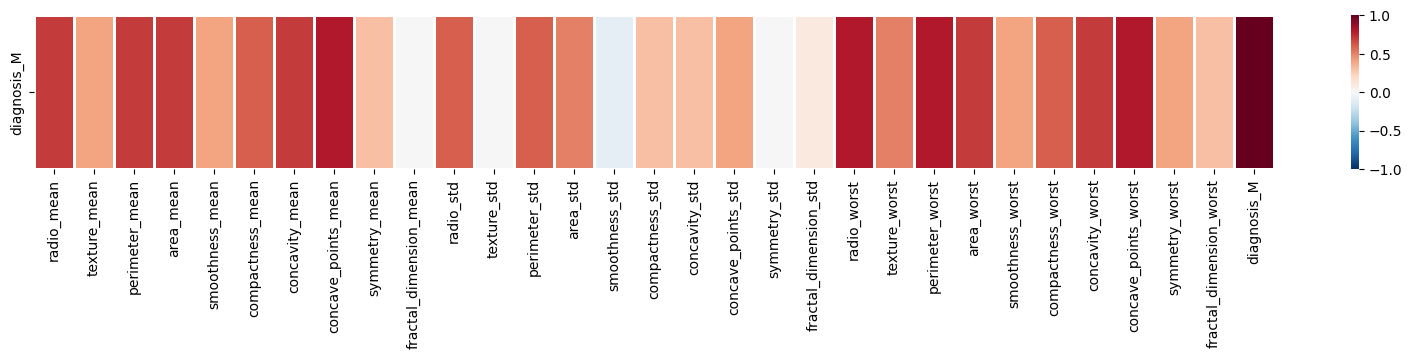

In [193]:
indice_correlacion(df_encoded)

Considerando este método Filter univariado de selección de variables, además de la reducción planteada podemos quedarnos además solo con las siguientes características:

*   radio_mead
*   perimeter_mean
*   area_mean
*   concavity_mean
*   concave_point_mean

Pregunta 1: ¿Qué características entre las proporcionadas tienen la mayor correlación con el diagnóstico?.

Respuesta: Estas variables son las que presentan una mayor correlación con la variable objetivo. Luego se verá que existe dependencia entre el radio, perimero y el area como es de esperar, lo que permitirá simplificar aún más el problema.

In [194]:
# Eliminacion de campos del dataframe
def reduccion(df, col_ini, col_fin):
  """
  Elimina las columnas, dentro del rango
  indicado, del dataframe de entrada.

  :param:
  :df: DataFrame con los atributos.
  :col_ini: Columna a partir de la cual eliminar.
  :col_fin: Columna hasta la cual eliminar.
  """
  columns_to_drop = df.columns[col_ini:col_fin]
  df = df.drop(columns=columns_to_drop)
  return df


In [195]:
df_encoded = reduccion(df_encoded, 10, 32)

In [196]:
df_encoded.head()

,ID,diagnosis,radio_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,diagnosis_M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,1


In [197]:
# Eliminacion de campos del dataframe
def reduccion2(df, lista):
  """
  Elimina las columnas, dentro del rango
  indicado, del dataframe de entrada.

  :param:
  :df: DataFrame con los atributos.
  :lista: Columna a partir de la cual eliminar.
  """
  columns_to_drop = df.columns[lista]
  df = df.drop(columns=columns_to_drop)
  return df

In [198]:
df_encoded =  reduccion2(df_encoded, [3, 6, 7])

In [199]:
df_encoded.head()

,ID,diagnosis,radio_mean,perimeter_mean,area_mean,concavity_mean,concave_points_mean,diagnosis_M
0,842302,M,17.99,122.80,1001.0,0.3001,0.14710,1
1,842517,M,20.57,132.90,1326.0,0.0869,0.07017,1
2,84300903,M,19.69,130.00,1203.0,0.1974,0.12790,1
3,84348301,M,11.42,77.58,386.1,0.2414,0.10520,1
4,84358402,M,20.29,135.10,1297.0,0.1980,0.10430,1


### 2.5 - Tratamiento de Outliers

In [200]:
def outliers(df, multiplo):
  """
  Nos permite definir umbrales de outliers,
  y detectar estos últimos.

  :param:
  :df: DataFrame con los atributos.
  :multiplo: Cantidad de desvíos estándar para definir
             umbral de 'outliers'.
  """
  # Se recorre cada característica
  features = df.columns
  for feature in features[2:]:
    mean = df[feature].mean()
    std = df[feature].std()
    lower_bound = mean - multiplo * std
    upper_bound = mean + multiplo * std
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Crea una nueva figura para cada boxplot
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.xlabel(feature)
    plt.axvline(x=lower_bound, color='r', linestyle='--')
    plt.axvline(x=upper_bound, color='r', linestyle='--')
    plt.show()

    print(f"Número de outliers en {feature}: {outliers[feature].count()}.\nLo que representa un {round(100*(outliers[feature].count()/df.shape[0]),1)} % del total de registros.\n")
    print(f'Outliers en {feature} (considerando 3 desvíos estándar):')
    print(outliers[feature])
    print('\n')

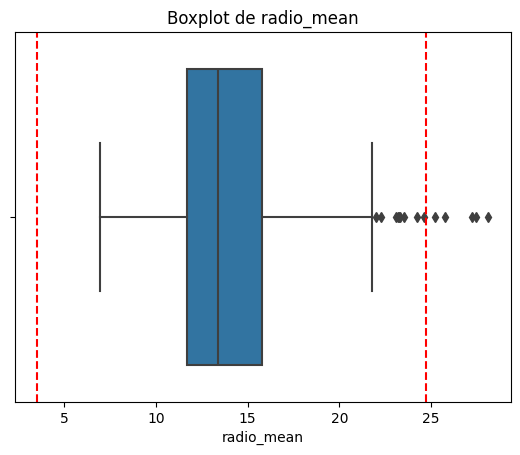

Número de outliers en radio_mean: 5.
Lo que representa un 0.9 % del total de registros.

Outliers en radio_mean (considerando 3 desvíos estándar):
82     25.22
180    27.22
212    28.11
352    25.73
461    27.42
Name: radio_mean, dtype: float64




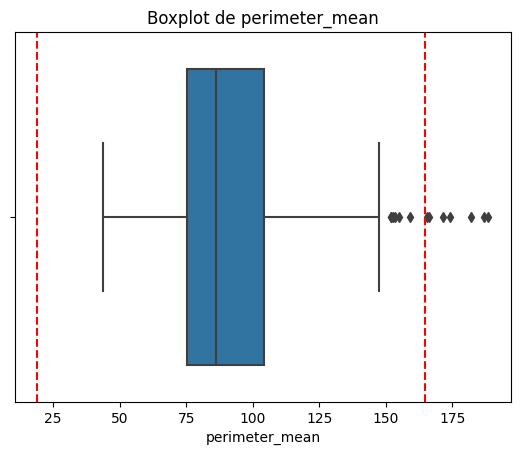

Número de outliers en perimeter_mean: 7.
Lo que representa un 1.2 % del total de registros.

Outliers en perimeter_mean (considerando 3 desvíos estándar):
82     171.5
122    166.2
180    182.1
212    188.5
352    174.2
461    186.9
521    165.5
Name: perimeter_mean, dtype: float64




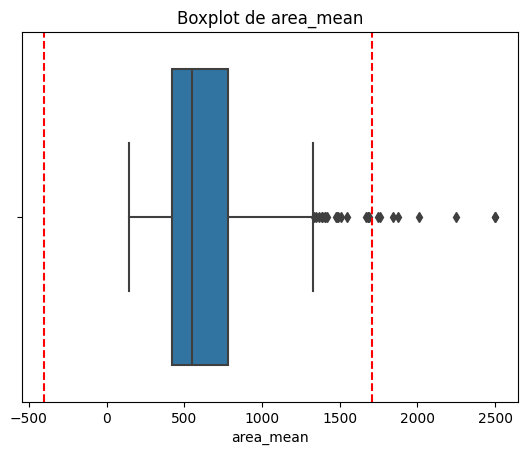

Número de outliers en area_mean: 8.
Lo que representa un 1.4 % del total de registros.

Outliers en area_mean (considerando 3 desvíos estándar):
82     1878.0
122    1761.0
180    2250.0
212    2499.0
339    1747.0
352    2010.0
461    2501.0
521    1841.0
Name: area_mean, dtype: float64




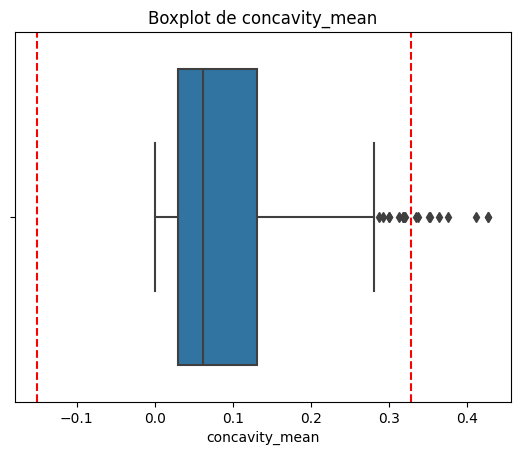

Número de outliers en concavity_mean: 9.
Lo que representa un 1.6 % del total de registros.

Outliers en concavity_mean (considerando 3 desvíos estándar):
78     0.3754
82     0.3339
108    0.4264
122    0.4268
152    0.4108
202    0.3523
352    0.3368
461    0.3635
567    0.3514
Name: concavity_mean, dtype: float64




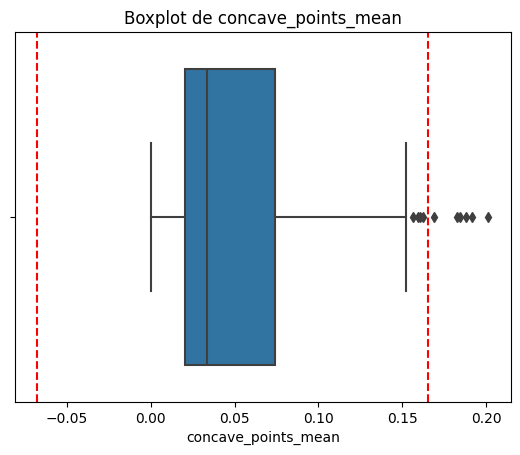

Número de outliers en concave_points_mean: 6.
Lo que representa un 1.1 % del total de registros.

Outliers en concave_points_mean (considerando 3 desvíos estándar):
82     0.1845
108    0.1823
122    0.2012
180    0.1878
352    0.1913
461    0.1689
Name: concave_points_mean, dtype: float64




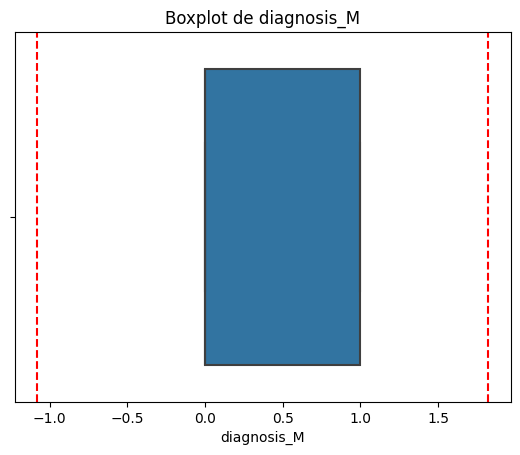

Número de outliers en diagnosis_M: 0.
Lo que representa un 0.0 % del total de registros.

Outliers en diagnosis_M (considerando 3 desvíos estándar):
Series([], Name: diagnosis_M, dtype: int32)




In [204]:
outliers(df_encoded, 3)

Observaciones: Se pudo ver que la cantidad de outliers es significaiva, en ninguno de los casos supera el 2%.

Debido a esto, el equipo consideró que no es necesario modificar esos valores con métodos de imputación como sea tratarlos coo faltantes, discretzación o censura ya que el impacto que tienen en la distribución de cada característica no es significativo. Debido a esto se decidió simplificar el problema y aplicar el método de poda.

In [205]:
def poda(df, multiplo):
    """
    Elimina mediante poda los registros donde al menos
    una de las características presente un outliers
    con el umbral definido.

    :param:
    :df: DataFrame con los atributos.
    :multiplo: Cantidad de desvíos estándar para definir
                umbral de 'outliers'.    
    """
    # Seleccionamos solo las columnas numéricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Calculamos el umbral de outliers para cada columna numérica
    thresholds = {}
    for column in numeric_columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        thresholds[column] = (mean - 3 * std_dev, mean + 3 * std_dev)

    # Filtramos el DataFrame para eliminar registros con outliers
    filtered_df = df.copy()
    for column, (lower, upper) in thresholds.items():
        filtered_df = filtered_df[(filtered_df[column] > lower) & (filtered_df[column] < upper)]

    return filtered_df

In [206]:
df_encoded_filtered = poda(df_encoded, 3)

In [209]:
df_encoded_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 568
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   546 non-null    int64  
 1   diagnosis            546 non-null    object 
 2   radio_mean           546 non-null    float64
 3   perimeter_mean       546 non-null    float64
 4   area_mean            546 non-null    float64
 5   concavity_mean       546 non-null    float64
 6   concave_points_mean  546 non-null    float64
 7   diagnosis_M          546 non-null    int32  
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 36.3+ KB


El método de poda se aplicó para todos los registros donde al menos se encontrara una característica donde se ubicara un *outlier* según el umbral propuesto de 3 desvíos estándar. Con estos resultados, se observó que el dataframe disminuyó su cantidad de registros en un 4% (de 569 a 546), lo cual no parece significativo a priori.

### 2.6 - Escalamiento de variables

En este caso se decidió estandarizar las características del dataframe dado que presentan rangos variables.

In [210]:
def escalado(df, ini_col, fin_col):
    """
    Escala las columnas, dentro del rango
    indicado, del dataframe de entrada.

    :param:
    :df: DataFrame con los atributos.
    :col_ini: Columna a partir de la cual eliminar.
    :col_fin: Columna hasta la cual eliminar.

    """
    # Normalizar columnas desde fin_col a fin_col
    cols_to_normalize = df.columns[ini_col:fin_col]

    df_normalized = df.copy()

    for col in cols_to_normalize:
        mean = df[col].mean()
        std = df[col].std()
        df_normalized[col] = (df[col] - mean) / std

    return df_normalized

In [211]:
df_encoded_filtered_normalizaded = escalado(df_encoded_filtered, 2, 7)

In [212]:
df_encoded_filtered_normalizaded.head()

,ID,diagnosis,radio_mean,perimeter_mean,area_mean,concavity_mean,concave_points_mean,diagnosis_M
0,842302,M,1.286037,1.491113,1.239158,3.104700,2.901601,1
1,842517,M,2.098269,1.955673,2.320212,0.058384,0.687794,1
2,84300903,M,1.821228,1.822284,1.911075,1.637267,2.349084,1
3,84348301,M,-0.782320,-0.588829,-0.806197,2.265963,1.695849,1
4,84358402,M,2.010119,2.056864,2.223749,1.645840,1.669949,1


Se persisten los datos luego de realizar el tratamiento descrito.

In [215]:
# Guardado del dataframe procesado

def guardar(df):
  """
  Guarda el data frame con los datos procesados
  en un archivo con terminación xlsx.

  :param:
  :df: DataFrame con los atributos.
  """
  # Especificar la ruta donde deseas guardar el archivo Excel
  ruta_excel = directorio_padre + '/Data/data_procesados.xlsx'

  # Leer la ruta del archivo Excel existente
  df_existente = pd.read_excel(ruta_excel)

  # Para el archivo existente pero ya con datos
  df_concatenado = pd.concat([df_existente, df], ignore_index=True)

  # Guardar el DataFrame concatenado en el archivo Excel existente
  df_concatenado.to_excel(ruta_excel, index=False)


In [217]:
guardar(df_encoded_filtered_normalizaded)

Bibliografía:

Isabelle Guyon, Andre Elisseeff (2003). An introduction to variable and feature selection. Journal of Machine Learning Research 3 (2003) 1157-1182


Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.


W. Street, W. Wolberg, O. Mangasarian. (1992)
Nuclear feature extraction for breast tumor diagnosis.
Published in Electronic imaging.


